In [12]:
import datetime
import time
from datetime import timedelta

def date_2_timestamp(year,mon,day):
    tempString=str(year)+"-"+str(mon)+"-"+str(day)
    tempTime=time.strptime(tempString, "%Y-%m-%d")
    return time.mktime(tempTime)

def timestamp_2_date(un_time):
    return datetime.datetime.fromtimestamp(un_time)


def timestamp_removeDay_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return temp_timestamp

def timestamp_removeDay_add(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    if temp_date.month==12:
        return date_2_timestamp(temp_date.year+1,1,1)
    else:
        return date_2_timestamp(temp_date.year,temp_date.month+1,1)
    
def date_removeDay_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return timestamp_2_date(temp_timestamp)

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

# 返回从最小到最大之间经过的时间戳，间隔为一个月
def max_min_2_timestampList(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        temp_date=date_removeDay_reduce(single_date)
        temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)

def timestamp_2_string(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    if temp_date.month<10:
        tempMonth="0"+str(temp_date.month)
    else:
        tempMonth=str(temp_date.month)
    return str(temp_date.year)+"-"+tempMonth

/tmp/ipykernel_1678510/2985399023.py:13: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")


41272


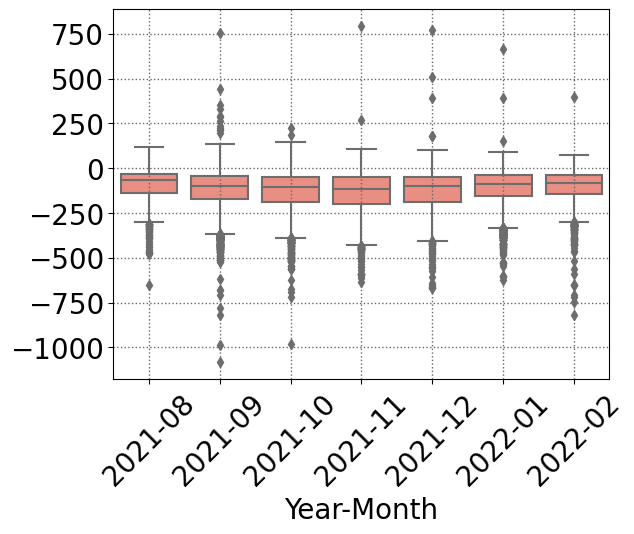

In [13]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")
df = df[ (df["isError_1"]!="none") ]
# df = df[ (df["flashbots_0"]==True) ]
print(len(df))

attacker_map={}
victim_map={}

for index,row in df.iterrows():
    transactionHash_0=row["transactionHash_0"]
    positionOriginal_0=row["positionOriginal_0"]
    positionEdited_0=row["positionEdited_0"]
    
    transactionHash_1=row["transactionHash_1"]
    positionOriginal_1=row["positionOriginal_1"]
    positionEdited_1=row["positionEdited_1"]
    
    timestamp=row["timestamp"]
    timestamp=timestamp_removeDay_reduce(timestamp)

    attacker_map[ transactionHash_0] = {"timestamp":int(timestamp), "pos":int(positionOriginal_0) - int(positionEdited_0)}
    victim_map[ transactionHash_1] = {"timestamp":int(timestamp), "pos":int(positionOriginal_1) - int(positionEdited_1)}

attacker_timestamp_Map={}
victim_timestamp_Map={}

for key,value in attacker_map.items():
    timestamp=value["timestamp"]
    pos=value["pos"]
    try:
        attacker_timestamp_Map[timestamp].append(pos)
    except:
        attacker_timestamp_Map[timestamp]=[pos]
        
for key,value in victim_map.items():
    timestamp=value["timestamp"]
    pos=value["pos"]
    try:
        victim_timestamp_Map[timestamp].append(pos)
    except:
        victim_timestamp_Map[timestamp]=[pos]
        
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in attacker_timestamp_Map:
        attacker_timestamp_Map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( attacker_timestamp_Map[tempTimestamp] )


sns.boxplot(data=list_value,color="salmon")
x = np.arange(len(list_key)) 
plt.xticks(ticks=x, labels=list_key, fontsize=20,rotation=45)
plt.xlabel('Year-Month', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")

plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/photo/txPos_attacker.pdf",bbox_inches='tight')

# victim

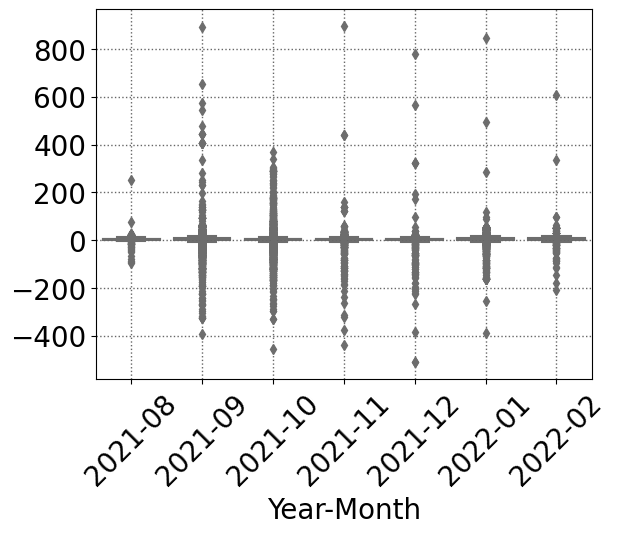

In [14]:
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in victim_timestamp_Map:
        victim_timestamp_Map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( victim_timestamp_Map[tempTimestamp] )

sns.boxplot(data=list_value,color="salmon")
x = np.arange(len(list_key)) 
plt.xticks(ticks=x, labels=list_key, fontsize=20,rotation=45)
plt.xlabel('Year-Month', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")

plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/photo/txPos_victim.pdf",bbox_inches='tight')